In [1]:
from graphviz import Digraph

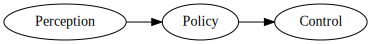

In [2]:
dot = Digraph(comment='DRL')
dot.graph_attr['rankdir'] = 'LR'
dot.edge('Perception', 'Policy')
dot.edge('Policy', 'Control')
dot

----------------

## 1. States and Observations

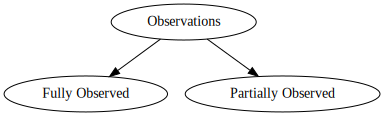

In [3]:
dot = Digraph(comment='Observations')
dot.node('1', 'Observations')
dot.node('2', 'Fully Observed')
dot.node('3', 'Partially Observed')
dot.edges(['12', '13'])
dot

## 2. Action Spaces

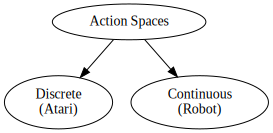

In [4]:
dot = Digraph(comment='Action')
dot.node('1', 'Action Spaces')
dot.node('2', 'Discrete\n(Atari)')
dot.node('3', 'Continuous\n(Robot)')
dot.edges(['12', '13'])
dot

## 3. Policies and Agent

$\pi(s, a)$

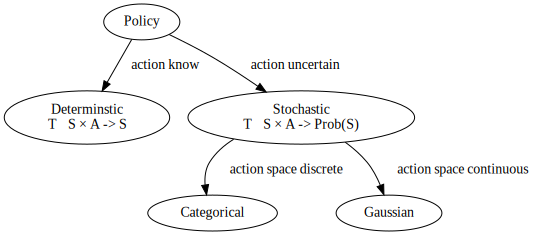

In [5]:
dot = Digraph(comment='Policy')
dot.graph_attr['rankdir'] = 'TB'

dot.node('1', label='Policy')
dot.node('2', label='Determinstic\nT：S × A -> S')
dot.node('3', label='Stochastic\nT：S × A -> Prob(S)')
dot.node('4', label='Categorical')
dot.node('5', label='Gaussian')

dot.edge('1', '2', label='action know')
dot.edge('1', '3', label='action uncertain')
dot.edge('3', '4', label='action space discrete')
dot.edge('3', '5', label='action space continuous')
dot

## 4. Trajectories (Episodes)

$$
\tau = (s_0, a_0, s_1, a_1, s_2, a_2, \cdots)
$$

## 5. Reward and Return

Reward: $r_t = R(s, a, s_t)$

Return: $R_t = r_{t+1} + r_{t+2} + r_{t+3} + r_{t+4} + \dots + = \sum_{k=0}^{\infty}r_{t + k + 1}$

All Return: $R(\tau) = \sum_{t=0}^{\infty}r_t$


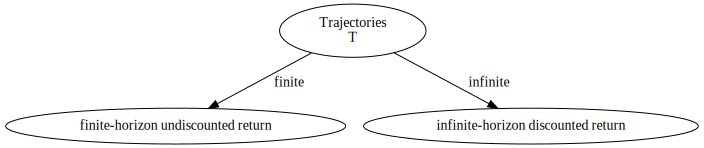

In [6]:
dot = Digraph(comment='Retrun')
dot.node('1', 'Trajectories\nT')
dot.node('2', 'finite-horizon undiscounted return')
dot.node('3', 'infinite-horizon discounted return')
dot.edge('1', '2', label='finite')
dot.edge('1', '3', label='infinite')
dot

1. finite-horizon undiscounted return

$$
R(\tau) = \sum_{t=0}^{T} r_t
$$

2. infinite-horizon discounted return (convergence)

$$
R(\tau) = \sum_{t=0}^{\infty} \gamma^t r_t
$$

## 6. Discounted

$R_t = r_{t+1} + \gamma r_{t+2} + \gamma^2 r_{t+3} + \gamma^3 r_{t+4} + \dots + = \sum_{k=0}^{\infty}\gamma^k r_{t + k + 1}$

## 7. Value Function & Bellman Equations

$$
\begin{align}
V^\pi(s) &= E_\pi \{R_t | s_t = s\} = E_\pi \{\sum_{k=0}^\infty \gamma^k r_{t+k+1} | s_t = s\} \\
Q^\pi(s, a) &= E_\pi \{R_t | s_t = s, a_t = a\} = E_\pi \{\sum_{k=0}^\infty \gamma^k r_{t+k+1} | s_t = s, a_t=a\} \\
V^\pi(s) &= \sum_{a \in A} \pi (a|s) * Q^\pi(a,s) \tag{TODO}
\end{align}
$$

Probability:

$$
\begin{align}
\mathcal{P}_{s s'}^a &= Pr(s_{t+1} = s' | s_t = s, a_t = a) \tag{1} \\
\mathcal{R}_{s s'}^a &= E\{ r_{t+1} | s_t = s, s_{t+1} = s', a_t = a \} \tag{2} \\
V^\pi(s) &= \sum_{a}{\pi(s, a)} \sum_{s'}{\mathcal P_{s s'}^{a}} \bigg [ \mathcal R_{s s'}^a + \gamma V^{\pi}(s') \bigg] \tag{3} \\
Q^{\pi}(s,a) &= \sum_{s'} \mathcal{P}_{ss'}^{a} \bigg[ \mathcal{R}_{ss'}^{a} + \gamma \sum_{a'} \pi(s', a') Q^{\pi}(s', a') \bigg] \tag{4}
\end{align}
$$


$\pi(s,a) -> \pi^*(s,a)$

## 8. Exploration/Exploitation

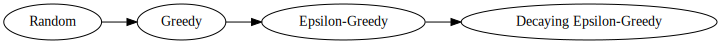

In [7]:
dot = Digraph(comment='EE')
dot.graph_attr['rankdir'] = 'LR'

dot.node('1', label='Random')
dot.node('2', label='Greedy')
dot.node('3', label='Epsilon-Greedy')
dot.node('4', label='Decaying Epsilon-Greedy')
dot.edges(['12','23','34'])
dot

## <img src="../assets/timg.jpeg" height="100px" width="400px"/>

| 符号 | 描述 |
|------|------|
|<img width='200'/> | <img width='600'/> |
| $S$ | 状态集(the set of all valid states), 环境的状态空间(观察Observation) |
| $A$| 动作集(the set of all valid actions), agent可选择的动作空间 |
| $R(s，a)$ |  奖励函数，返回的值表示在**s**状态下执行**a**动作的奖励, $r_t = R(s_t, a_t, s_{t+1})$|
| $T(s'|s,a)$ |  状态转移概率函数，表示从**s**状态执行**a**动作后环境转移至**s′**状态的概, $P(s'|s, a)$|
| $\rho_0$ |  起始状态分布 the starting state distribution |

假设: $P(s_{t+1}|s_t) = P(s_{t+1}|s_1,...,s_t)$

[Game Demo: Taxi](/notebooks/rl/datasets/Taxi.ipynb)

[Game Demo: FrozenLake](/notebooks/rl/datasets/FrozenLake.ipynb)